## Transport durch Diffusion

### 1D-Diffusion

Wenn wir in der Navier-Stokes-Gleichung für inkompressible Fluide die konvektiven Terme und die Quellterme weglassen und alles auf eine Dimension reduzieren bleibt nur noch folgende Gleichung übrig:

$$\frac{\partial u}{\partial t}= \nu \frac{\partial^2 u}{\partial x^2}$$

Die Besonderheit hier ist die 2. Ableitung, dafür ist die Gleichung linear und damit gutmütiger als die Konvektionsgleichung. Da wir bereits kennengelernt haben, wie man eine 2. Ableitung mit dem Finite-Differenzen-Verfahren diskretisiert:

$$\frac{\partial ^2 u}{\partial x^2}=\frac{u_{i+1}-2u_{i}+u_{i-1}}{\Delta x^2} + O(\Delta x^2)$$

und wie die zeitliche Diskretisierung aussieht, können wir die diskretisierte Diffusionsgleichung sofort hinschreiben:

$$\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}=\nu\frac{u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}}{\Delta x^2}$$

und wieder so umstellen, dass die unbekannte Geschwindigkeit zum neuen Zeitpunkt $n+1$ auf der linken Seite steht:

$$u_{i}^{n+1}=u_{i}^{n}+\frac{\nu\Delta t}{\Delta x^2}(u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n})$$

Für unser erstes Beispiel verwenden wir wieder die Rechteckfunktion als Startbedingung. Der Rest ist ebenfalls identisch mit der bisherigen Vorgehensweise bei der 1D-Konvektion.

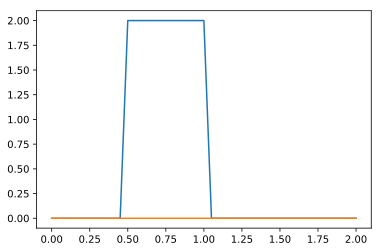

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

L  = 2.0        # Länge unseres Rechengebiets
nx = 41         # Anzahl der diskreten Punkte
dx = L / (nx-1) # Abstand zwischen den Punkten
t_end = 100     # Endzeitpunkt für die Berechnung
nu  = 0.1       # die kinematische Viskosität in m^2/s
CFL = 0.2
dt = CFL * dx**2 / nu   # Zeitschrittweite

# Anfangsbedingung (Rechteckfunktion)
u_init = np.zeros(nx)                   # ganzes Gebiet mit 1 belegen
u_init[int(0.5/dx):int(1/dx+1)] = 2.0  # u=2 zwischen 0.5 und 1

xi = np.linspace(0,L,nx)          # x-Koordinaten der diskreten Punkte

u_alt = u_init.copy()  # wir übernehmen zunächst einmal die Anfangsbedingung
u_neu = u_alt.copy()
t = 0                  # der Anfangszeitpunkt ist 0

while t < t_end:      # Schleife, solange bis Endzeitpunkt erreicht ist
    # die innere Schleife sparen wir uns, in dem wir ganze Teile der Arrays
    # addieren und subtrahieren
    u_neu[1:-1] = (u_alt[1:-1] 
                   + nu * dt / dx**2 * (u_alt[2:] 
                                        - 2 * u_alt[1:-1] 
                                        + u_alt[:-2]))
    u_neu[0] = 0.0   #u_neu[1]
    u_neu[-1] = 0.0  #u_neu[-2]
    u_alt = u_neu.copy()
    t += dt   
plt.plot(xi, u_init)
plt.plot(xi, u_neu);

Es funktioniert!

**Aufgabe:** Was passiert an den Rändern? Lassen Sie die Simulation noch etwas weiterlaufen. Welche Randbedingung haben wir (wahrscheinlich ohne es zu merken) implementiert?

### 2D-Diffusion

Die 2D-Diffusionsgleichung lautet für die $x$-Richtung:

$$\frac{\partial u}{\partial t} = \nu \frac{\partial ^2 u}{\partial x^2} + \nu \frac{\partial ^2 u}{\partial y^2}$$

Anders als bei der 2D-Konvektionsgleichung, sind die Differentialgleichungen für die beiden Raumrichtungen nicht gekoppelt. Wir können sie also getrennt betrachten, bzw. beispielhaft nur die $x$-Richtung.

Wenn wir wieder die oben gezeigte Diskretisierung anwenden, folgt:

$$\frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} = \nu \frac{u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n}{\Delta x^2} + \nu \frac{u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2}$$

Und wieder sortieren wir die Gleichung so um, dass die Geschwindigkeit zum neuen Zeitpunkt auf der linken Seite steht:

$$u_{i,j}^{n+1} = u_{i,j}^n + \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2}(u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n)$$

**Aufgabe:** Die Implementierung in Python funktioniert analog der bisherigen Vorgehensweise. Schreiben Sie das dafür notwendige Pythonprogramm unter Verwendung der bereits vorhandenen Code-Schnipsel. Versuchen Sie jeden Schritt nachzuvollziehen.

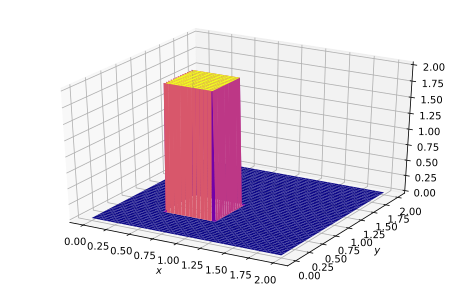

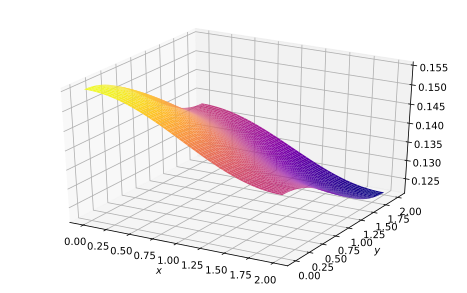

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

# Variablen
L  = 2.0        # Länge des Rechengebiets
H  = 2.0        # Höhe des Rechengebiets
nx = 101        # Anzahl der diskreten Punkte in x-Richtung
ny = 101        # Anzahl der diskreten Punkte in y-Richtung
dx = L / (nx-1) # Abstand zwischen den Punkten in x-Richtung
dy = H / (ny-1) # Abstand zwischen den Punkten in y-Richtung
t_end = 10     # Endzeitpunkt für die Berechnung
CFL   = 0.2     # Courant-Friedrichs-Levy-Zahl
nu = 0.1
dt = CFL*dx**2/nu   # Zeitschrittweite


u_init = np.ones(nx)                   # ganzes Gebiet mit 1 belegen
u_init[int(0.5/dx):int(1/dx+1)] = 2.0  # u=2 zwischen 0.5 und 1

xi = np.linspace(0,L,nx)       # x-Koordinaten der diskreten Punkte
yi = np.linspace(0,L,ny)       # y-Koordinaten der diskreten Punkte

u_init = np.zeros((ny, nx))     # ny x nx - Werte für die u-Komponente
v_init = np.zeros((ny, nx))     # ny x nx - Werte für die v-Komponente


## Anfangsbedingung
u_init[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
v_init[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2

X, Y = np.meshgrid(xi, yi)

fig = plt.figure(figsize=(8, 5), dpi=100)
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, u_init, cmap='plasma', rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

u_alt = u_init.copy()  # wir übernehmen zunächst einmal die Anfangsbedingung
v_alt = v_init.copy()
u_neu = u_alt.copy()
v_neu = v_alt.copy()
t = 0                  # der Anfangszeitpunkt ist 0

while t < t_end:      # Schleife, solange bis Endzeitpunkt erreicht ist
    u_neu[1:-1, 1:-1] = (u_alt[1:-1, 1:-1] 
                 + nu*dt/dx**2*
                   (u_alt[2:, 1:-1] - 2*u_alt[1:-1, 1:-1] + u_alt[0:-2,1:-1])
                 + nu*dt/dy**2* 
                   (u_alt[1:-1, 2:] - 2*u_alt[1:-1, 1:-1] + u_alt[1:-1,0:-2]))
    v_neu[1:-1, 1:-1] = (v_alt[1:-1, 1:-1] 
                 + nu*dt/dx**2*
                   (v_alt[2:, 1:-1] - 2*v_alt[1:-1, 1:-1] + v_alt[0:-2,1:-1])
                 + nu*dt/dy**2* 
                   (v_alt[1:-1, 2:] - 2*v_alt[1:-1, 1:-1] + v_alt[1:-1,0:-2]))    


    u_neu[0, :] = u_neu[1, :]
    u_neu[:, 0] = u_neu[:, 1]
    u_neu[-1, :] = u_neu[-2, :]
    u_neu[:, -1] = u_neu[:, -2]
    v_neu[0, :] = 0
    v_neu[:, 0] = 0
    v_neu[-1, :] = 0
    v_neu[:, -1] = 0
    
    u_alt = u_neu.copy()
    v_alt = v_neu.copy()
    t += dt

fig = plt.figure(figsize=(8, 5), dpi=100)
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, u_neu, cmap='plasma', rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

Nachdem Sie das Programm erstellt und getestet haben, geht es hier weiter mit der Kombination aus Konvektion und Diffusion, der sog. [Burgersgleichung](TFD - 3.7 Kontinuumsstroemungen - Burgersgleichung.ipynb).


---
Dieses Notebook folgt einer Idee von Lorena A. Barba und deren exzellenter Ausarbeitung in Python (["12 Steps to Navier Stokes"](http://lorenabarba.com/blog/cfd-python-12-steps-to-navier-stokes/)).

Der folgende Python-Code darf ignoriert werden. Er dient nur dazu, die richtige Formatvorlage für die Jupyter-Notebooks zu laden.

In [2]:
from IPython.core.display import HTML
def css_styling():
    styles = open('TFDStyle.css', 'r').read()
    return HTML(styles)
css_styling()